 ## Bussiness Problem :

## Insurance companies need to set the insurance premiums following the population trends.

## The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

## STEP-1: Load the data and perform the basic EDA to understand the data.

In [46]:
# IMPORTING THE REQURIED LIBRARIES:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
# LOADING THE DATASET:

df = pd.read_csv(r"C:\Users\Kavya\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# SUMMARY OF THE DATASET:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
# TO CHECK MISSING VALUES IN THE DATASET:

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 1.There is no missing values.
### 2. All the datatypes also correct.
### 3. There are no null values.

In [52]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [53]:
# df.drop_duplicates(inplace=True)

In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for x in range(0,len(columns)):
    ins=columns[x]
    value=df[ins].value_counts()
    print(value)
    print("----------------------------------")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
----------------------------------
sex
male      676
female    662
Name: count, dtype: int64
----------------------------------
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
----------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
----------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64
-----------------

## BASIC EDA:

## UNIVARIATE ANALYSIS

## SEX

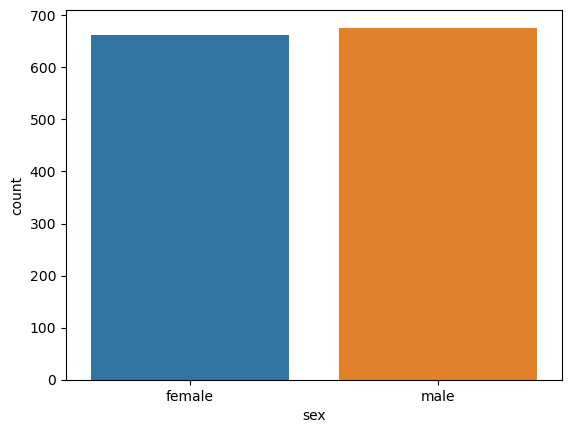

In [56]:
#PLOTTING A COUNTPLOT:

sns.countplot(x='sex',data=df)
plt.show()

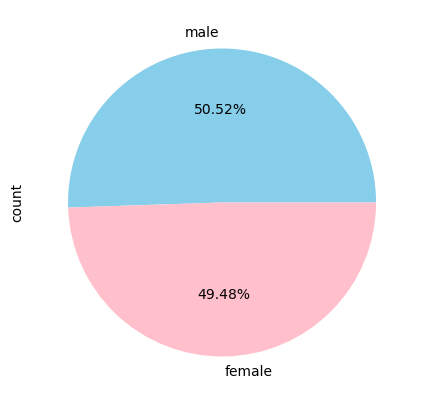

In [57]:
# PLOTTING A PIE CHART:

plt.figure(figsize=(10,5))
df['sex'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['SkyBlue','Pink'])
plt.show()

### NOTE: "The male gender has a slightly larger population, but the populations of males and females are nearly equal."

## REGION

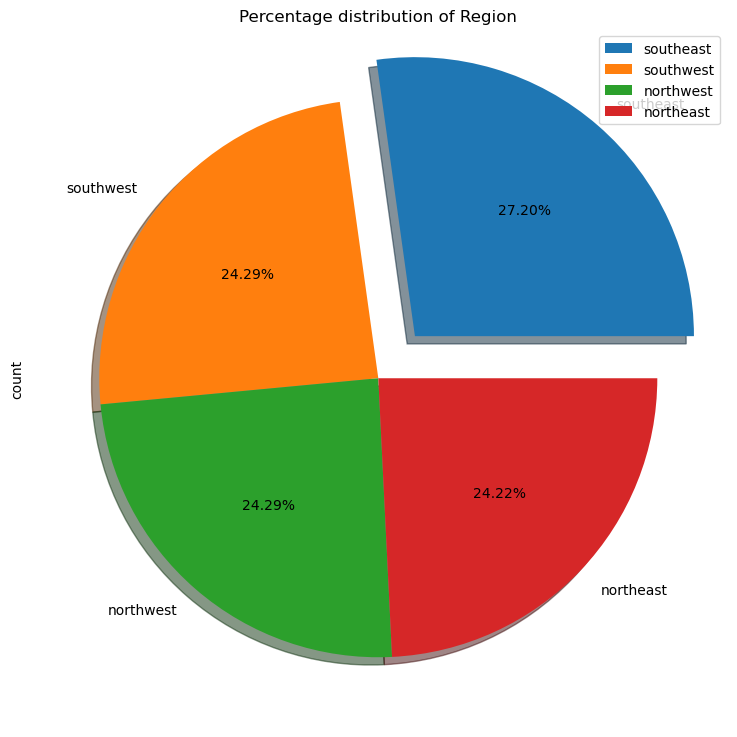

In [58]:
# PLOTTING A PIECHART:

plt.figure(figsize=(9,9.5))
df['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

## SMOKER

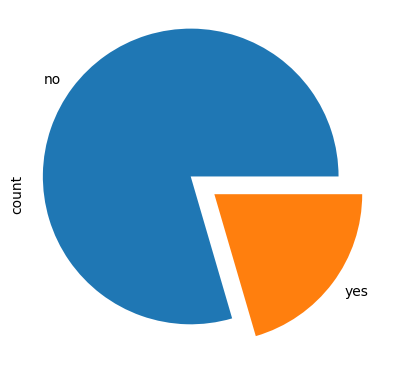

In [59]:
# PLOTTING PIECHART

df['smoker'].value_counts().plot(kind='pie',explode=[0.2,0])
plt.show()

### NOTE: "There are very few smokers in this dataset."

## BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS

## Smoker vs Sex

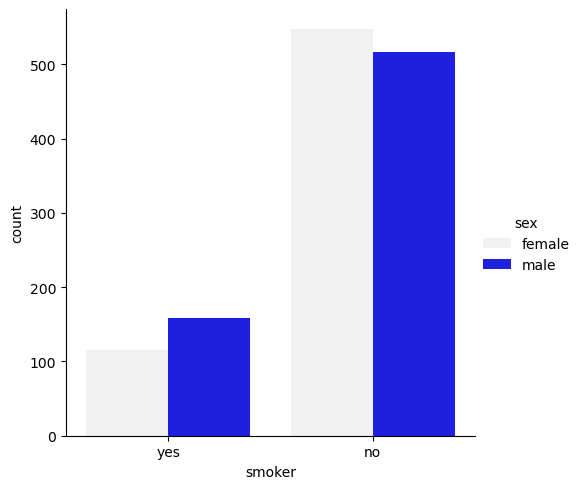

In [60]:
sns.catplot(data=df,x='smoker',kind='count',hue='sex',color='blue')
plt.show()

### NOTE:"The number of male smokers is significantly higher compared to female smokers."

## sex vs charges

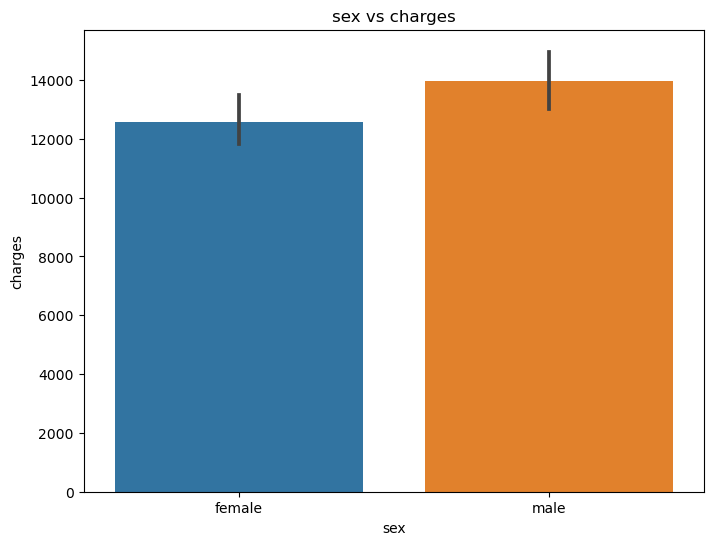

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges')
plt.show()

### NOTE:"The medical costs for males are higher than those for females."

## HEAT MAP

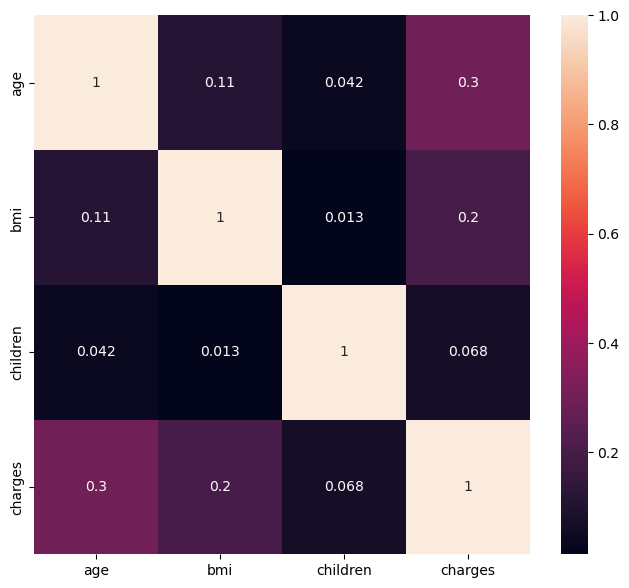

In [62]:
#plotting a heat map to find the correlation between the numerical features

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True), annot=True);

###  NOTE:"There is a strong correlation between age and the target variable charges."





## STEP-2: Document the below mentioned points properly: - Identify the input and output/target variables. - Identify the type of ML Task. - Identify the Evaluation Metric. - For regression task - Mean Absolute Error - For classification task - AccuraTarget variable : Charges
- Target variable : Charges
- Target variable present in historical data : Supervised M.L
- Target variable is Continuous : Regression
- For Regression task : Mean Absolute Error


## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [63]:
from sklearn.model_selection import train_test_split

y =df['charges'] # output
X =df.iloc[:,0:6] #input

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


## STEP-4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [64]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [65]:
X_train_cat.head()

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest


In [66]:
X_train_num.head()

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0


##  RESCALING CAT COLUMNS IN TRAIN DATA

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
1223,0.0,1.0,0.0,1.0,0.0
1137,0.0,0.0,1.0,0.0,0.0



## RESCALING NUM COLUMNS IN TRAIN DATA

In [68]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
1075,-0.514853,-0.181331,-0.063607
131,1.548746,-1.393130,-0.892144
15,-1.439915,-0.982242,-0.063607
1223,-1.368757,-1.011133,-0.892144
1137,-0.941805,-1.362635,-0.892144


In [69]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,-0.514853,-0.181331,-0.063607,0.0,0.0,0.0,1.0,0.0
131,1.548746,-1.393130,-0.892144,0.0,0.0,0.0,0.0,0.0
15,-1.439915,-0.982242,-0.063607,1.0,0.0,0.0,0.0,1.0
1223,-1.368757,-1.011133,-0.892144,0.0,1.0,0.0,1.0,0.0
1137,-0.941805,-1.362635,-0.892144,0.0,0.0,1.0,0.0,0.0


## STEP-5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [70]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

## RESCALING NUM COLUMNS IN TEST DATA

In [71]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
578,0.908319,-0.083424,-0.063607
610,0.552526,-0.216642,-0.063607
569,0.623684,1.580192,0.764931
1034,1.548746,1.229492,-0.892144
198,0.837160,-2.033538,-0.892144


## RESCALING CAT COLUMNS IN TEST DATA

In [72]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_tansformed.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,1.0,0.0,0.0,0.0,1.0
610,0.0,0.0,0.0,1.0,0.0
569,1.0,1.0,1.0,0.0,0.0
1034,1.0,0.0,1.0,0.0,0.0
198,0.0,0.0,1.0,0.0,0.0


In [73]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,0.908319,-0.083424,-0.063607,1.0,0.0,0.0,0.0,1.0
610,0.552526,-0.216642,-0.063607,0.0,0.0,0.0,1.0,0.0
569,0.623684,1.580192,0.764931,1.0,1.0,1.0,0.0,0.0
1034,1.548746,1.229492,-0.892144,1.0,0.0,1.0,0.0,0.0
198,0.837160,-2.033538,-0.892144,0.0,0.0,1.0,0.0,0.0


## STEP-6: Model Training Phase 
- Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression / Linear Regression
- Support Vector Machines
- Decision Trees
- Random Forest


## LINEAR REGRESSION

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


Regression = LinearRegression()
Regression.fit(X_train_transformed, y_train)

# Making Predictions
y_pred_LR = Regression.predict(X_test_transformed)

#Evaluations
from sklearn import metrics
mae_LR = metrics.mean_absolute_error(y_test, y_pred_LR)
print('Mean Absolute Error: ', mae_LR)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_LR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

Mean Absolute Error:  4012.7152768530855
Mean Squared Error:  32135747.23938178
Root Mean Squared Error:  5668.8400259119835


## KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor

KNNreg = KNeighborsRegressor()
KNNreg.fit(X_train_transformed, y_train)

# Making Predictions
y_pred_KNN = KNNreg.predict(X_test_transformed)

# Evaluation
from sklearn import metrics
mae_KNN = metrics.mean_absolute_error(y_test, y_pred_KNN)
print('Mean Absolute Error: ', mae_KNN)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Mean Absolute Error:  4146.4536904686565
Mean Squared Error:  45611979.05104784
Root Mean Squared Error:  6753.664120390341


## RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor()
RFreg.fit(X_train_transformed, y_train)

# Making Predictions
y_pred_RF = RFreg.predict(X_test_transformed)
# Evaluation
from sklearn import metrics
mae_RF = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error: ', mae_RF)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

Mean Absolute Error:  2687.8342872529565
Mean Squared Error:  19968240.48999068
Root Mean Squared Error:  4468.583723059319


## DECISION TREE

In [77]:
from sklearn.tree import DecisionTreeRegressor

DTreg = DecisionTreeRegressor()
DTreg.fit(X_train_transformed, y_train)

# Making Predictions
y_pred_DT = DTreg.predict(X_test_transformed)

# Evaluation
from sklearn import metrics
mae_DT = metrics.mean_absolute_error(y_test, y_pred_DT)
print('Mean Absolute Error: ', mae_DT)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

Mean Absolute Error:  3281.225502056717
Mean Squared Error:  45590513.71050232
Root Mean Squared Error:  6752.074770802106


## SUPPORT VECTOR REGRESSOR

In [78]:

from sklearn.svm import SVR
svrReg = SVR()
svrReg.fit(X_train_transformed,y_train)

# Making predictions
y_pred_SVR = svrReg.predict(X_test_transformed)

# Evaluation
from sklearn import metrics
mae_SVR = metrics.mean_absolute_error(y_test, y_pred_LR)
print('Mean Absolute Error: ', mae_SVR)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_SVR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)))

Mean Absolute Error:  4012.7152768530855
Mean Squared Error:  172599496.34079322
Root Mean Squared Error:  13137.712751494959


## Step-7:Predict and evaluate each model separately using the correct evaluation metric. 


In [79]:
evaluation = pd.DataFrame({'Algorithms':['Linear Regression','KNN','Decision Tree','Random Forest','SVR'] ,
                           'MAE': [mae_LR,mae_KNN,mae_DT,mae_RF,mae_SVR]})
evaluation

,Algorithms,MAE
0,Linear Regression,4012.715277
1,KNN,4146.453690
2,Decision Tree,3281.225502
3,Random Forest,2687.834287
4,SVR,4012.715277


## STEP-8:Display a plot which shows all the algorithms applied along with the scores achieved.

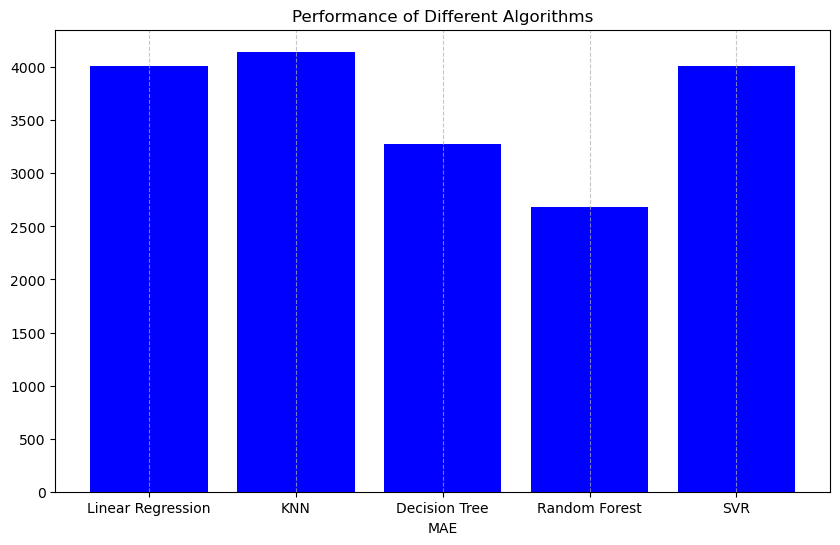

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
Algorithms = ['Linear Regression','KNN','Decision Tree','Random Forest','SVR']
MAE = [mae_LR,mae_KNN,mae_DT,mae_RF,mae_SVR]  # Scores achieved by each algorithm

# Plotting the scores
plt.figure(figsize=(10,6))
plt.bar(Algorithms, MAE, color='Blue')
plt.xlabel('MAE')
plt.title('Performance of Different Algorithms')
# plt.xlim(0, 10)  # Set the limit for the x-axis
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

## CONCLUSION:

## "Random Forest has the lowest mean absolute error among all the algorithms tested, making it the best choice for predicting medical costs."